In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/Tejus/Downloads/tumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Tejus/Downloads/tumor\brain-tumor-detection-cnn-with-99-accuracy.ipynb
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\1 no.jpeg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\10 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\11 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\12 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\13 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\14 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\15 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\17 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\18 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\19 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\2 no.jpeg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\20 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\21 no.jpg
C:/Users/Tejus/Downloads/tumor\brain_tumor_dataset\no\22 no.jpg
C:/Users/Tejus/Downloads

# Import library

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

# Load data and visualize

In [10]:
all_data_dir = "C:/Users/Tejus/Downloads/tumor/brain_tumor_dataset"

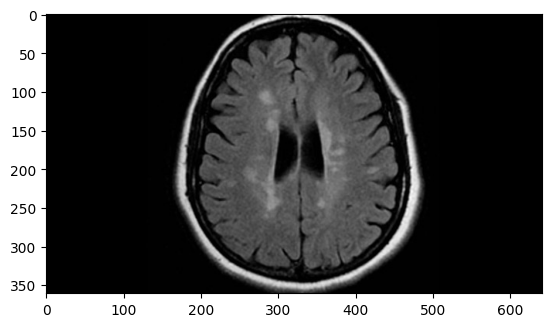

In [25]:
img = mpimg.imread("C:/Users/Tejus/Downloads/tumor/brain_tumor_dataset/no/no 8.jpg")
plt.imshow(img)

In [15]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
img.shape

(361, 642, 3)

In [17]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (225, 225, 3)


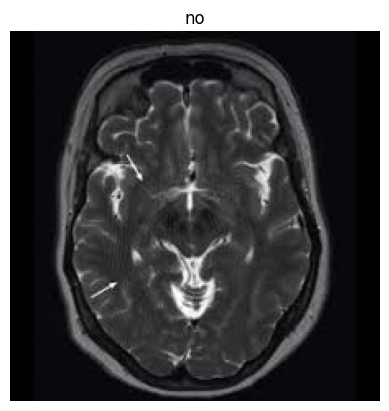

In [26]:
img_no = view_random_image(target_dir="C:/Users/Tejus/Downloads/tumor/brain_tumor_dataset/",
                        target_class="no")

Image shape: (960, 781, 3)


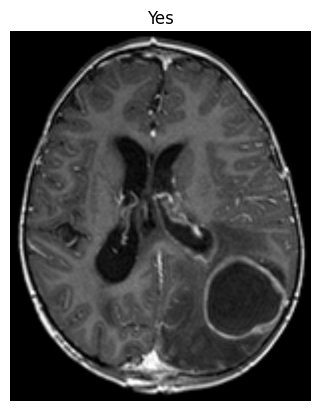

In [28]:
img_no = view_random_image(target_dir="C:/Users/Tejus/Downloads/tumor/brain_tumor_dataset/",
                        target_class="Yes")

# Data preprocess

In [29]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [30]:
train_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [31]:
test_data

# CNN

In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [34]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [35]:
model_history = model.fit(train_data, 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 43s 5s/step - loss: 0.6560 - accuracy: 0.5889 - val_loss: 0.5410 - val_accuracy: 0.7628
Epoch 2/50
8/8 [==============================] - 38s 5s/step - loss: 0.5759 - accuracy: 0.7312 - val_loss: 0.5837 - val_accuracy: 0.6838
Epoch 3/50
8/8 [==============================] - 38s 5s/step - loss: 0.5539 - accuracy: 0.7352 - val_loss: 0.5058 - val_accuracy: 0.7668
Epoch 4/50
8/8 [==============================] - 40s 5s/step - loss: 0.5015 - accuracy: 0.7787 - val_loss: 0.4757 - val_accuracy: 0.7905
Epoch 5/50
8/8 [==============================] - 37s 5s/step - loss: 0.4830 - accuracy: 0.7826 - val_loss: 0.4639 - val_accuracy: 0.7984
Epoch 6/50
8/8 [==============================] - 37s 5s/step - loss: 0.4592 - accuracy: 0.7866 - val_loss: 0.4409 - val_accuracy: 0.8261
Epoch 7/50
8/8 [==============================] - 37s 5s/step - loss: 0.4786 - accuracy: 0.7826 - val_loss: 0.4732 - val_accuracy: 0.7589
Epoch 8/50
8/8 [==================

In [42]:
model.save("brain_tumor_detection_model.h5")

In [41]:
model.evaluate(test_data)

8/8 [==============================] - 6s 667ms/step - loss: 0.0570 - accuracy: 0.9842


[0.056952349841594696, 0.9841897487640381]

<Axes: >

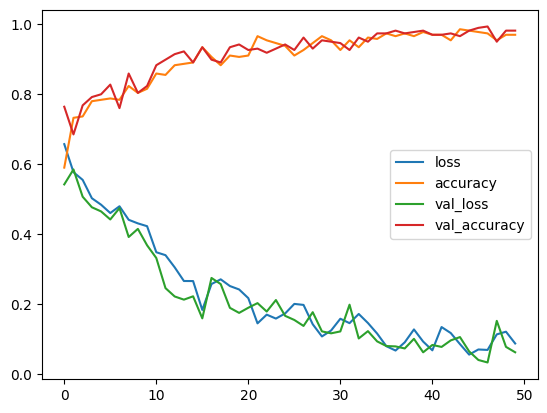

In [37]:
pd.DataFrame(model_history.history).plot()

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                 